In [ ]:
#imports
%matplotlib inline
from ipywidgets import interactive
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

Import once. Nessecary for all Vorlesung sections.

#Vorlesung 1

##Bandpass Filter

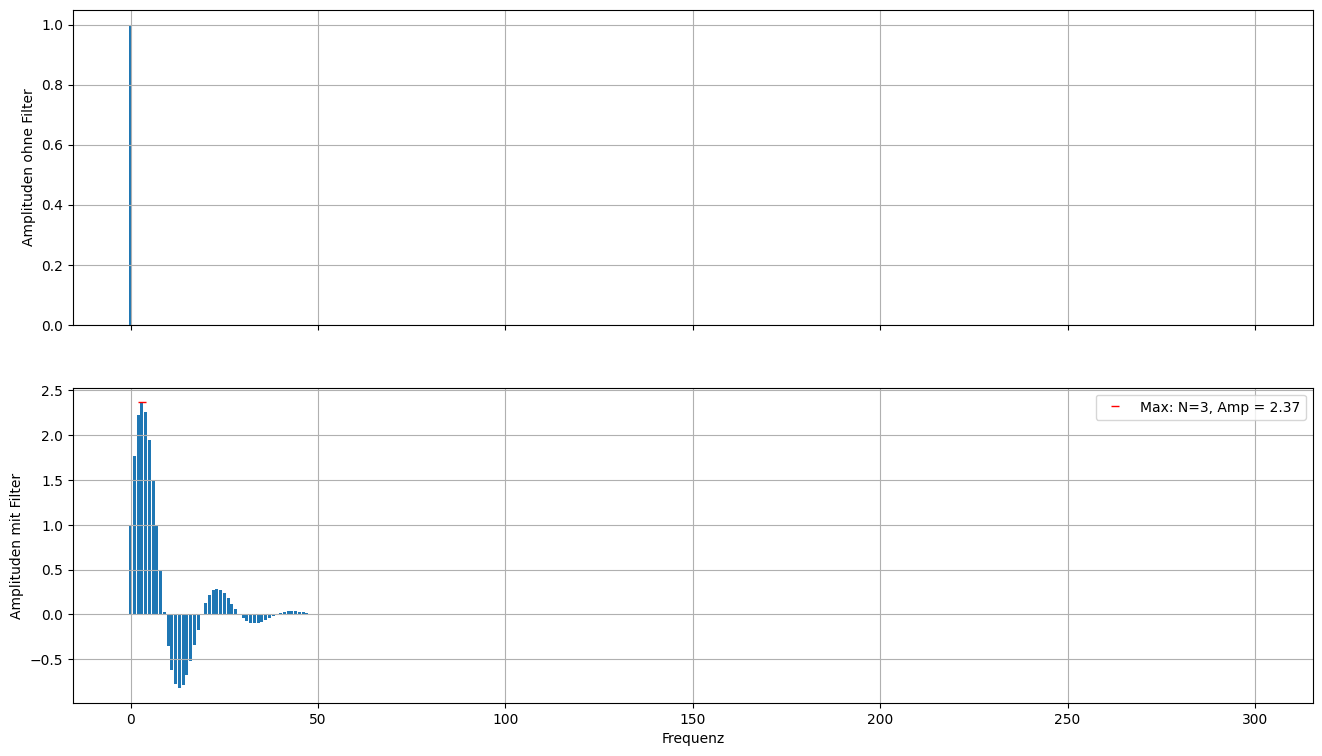

In [ ]:
#Bandpass

x_values = []
Y = []

X = np.arange(301)

#Originalsignal
for i in range (0,301):
    x_values.append(np.sin((np.pi*i*(0.025+0.0005*i))))

max = 0
max_freq = 0
Y.append(0)
Y.append(0)

#Gefiltertes Signal
for a in range(2,301):
    temp = 1.7119 * Y[a-1] - 0.81*Y[a-2] + x_values[a]-x_values[a-1]
    Y.append(temp)
    if abs(temp) > max:
        max = abs(temp)
        max_freq = a

Y = np.array(Y)


# Balkendiagramm erstellen
fig, axs = plt.subplots(2,sharex=True)
axs[0].bar(X, x_values)
axs[0].set_ylabel('Amplituden ohne Filter')
axs[0].grid(True)

axs[1].bar(X, Y)
axs[1].set_xlabel('Frequenz')
axs[1].set_ylabel('Amplituden mit Filter')
axs[1].grid(True)
axs[1].plot(max_freq,Y[max_freq],'r_',label='Max: N=%i, Amp = %.2f'%(max_freq, Y[max_freq]))
plt.legend()

#Figure ausgabe groesse in Zoll hier 16:9
fig.set_figwidth(16)
fig.set_figheight(9)


# Diagramm anzeigen
plt.show()

##Bandsperre Filter

-0.0021764506875863177


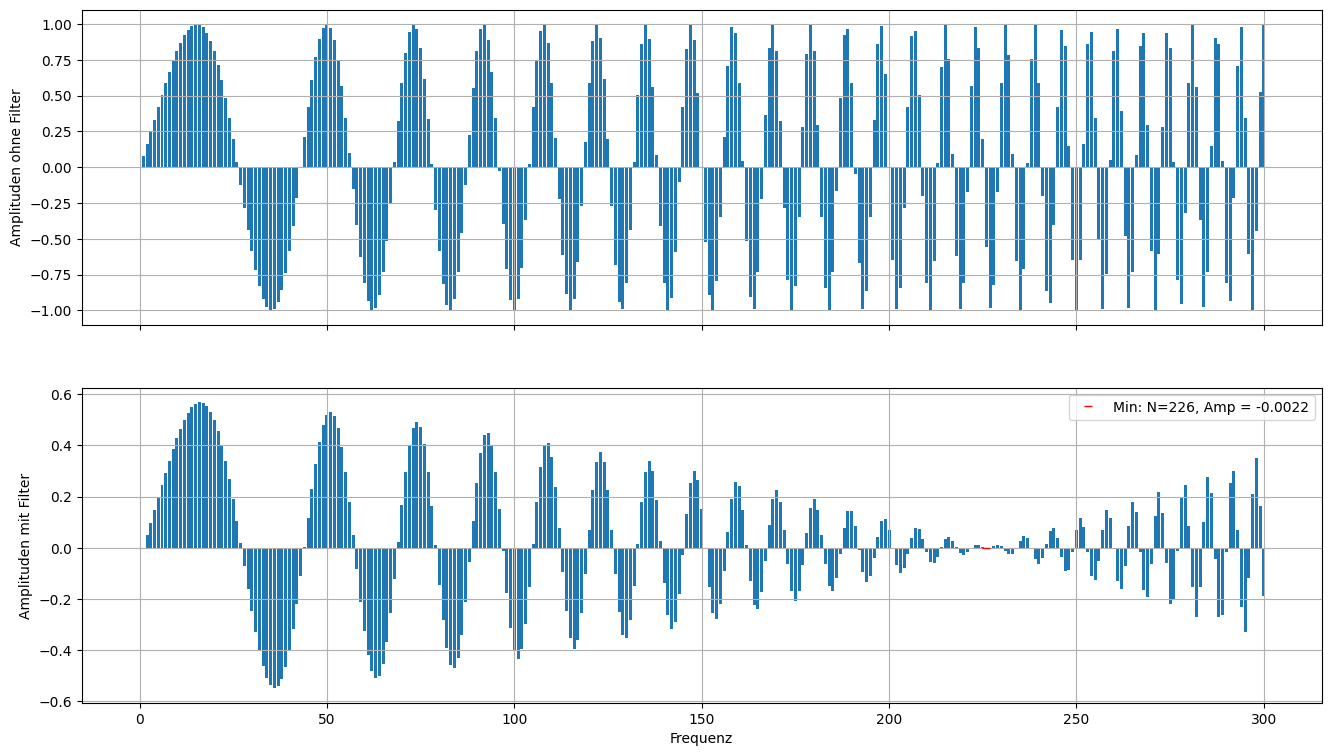

In [ ]:
#Bandsperre

x_values = []
Y = []

X = np.arange(301)

#Originalsignal
for i in range (0,301):
    x_values.append(np.sin((np.pi*i*(0.025+0.0005*i))))

min = 5
min_freq = 0
Y.append(0)
Y.append(0)

#Gefiltertes Signal
for a in range(2,301):
    #Y[N] = X[N] - 1.4142 *X[N-1] + X[N-2]
    temp = x_values[a] - 1.4142*x_values[a-1] + x_values[a-2]
    Y.append(temp)

for a in range(2,300):
    #minimum über 3 Werte mitteln
    temp = abs(Y[a-1])+abs(Y[a])+abs(Y[a+1])
    if temp < min:
        min = temp
        min_freq = a

Y = np.array(Y)

print(Y[min_freq])

# Balkendiagramm erstellen
fig, axs = plt.subplots(2,sharex=True)
axs[0].bar(X, x_values)
axs[0].set_ylabel('Amplituden ohne Filter')
axs[0].grid(True)

axs[1].bar(X, Y)
axs[1].set_xlabel('Frequenz')
axs[1].set_ylabel('Amplituden mit Filter')
axs[1].grid(True)
axs[1].plot(min_freq,Y[min_freq],'r_',label='Min: N=%i, Amp = %.4f'%(min_freq, Y[min_freq]))
plt.legend()

#Figure ausgabe groesse in Zoll hier in 16:9
fig.set_figwidth(16)
fig.set_figheight(9)


# Diagramm anzeigen
plt.show()

# Vorlesung 2

##Zeitdiskrete Standartfunktionen Beispiel (S.11)

[0.0, 0.8660254037844386, 0.8660254037844387, 1.2246467991473532e-16, -0.8660254037844384, -0.8660254037844386, -2.4492935982947064e-16, 0.8660254037844384, 0.8660254037844392, 3.6739403974420594e-16]


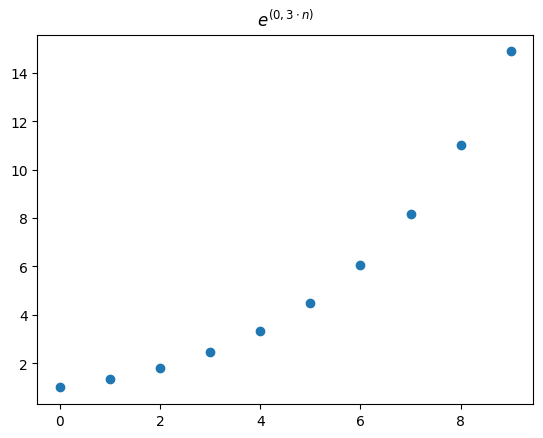

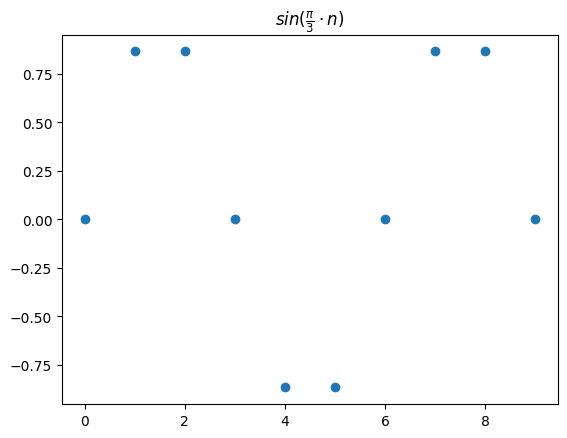

In [ ]:
#x(n) = e^(0,3n)
x_n = []
#x2(n) = sin(pi/3 n)
x_n2 = []
X = np.arange(10)
for i in range(0,10):
    x_n.append(np.exp(0.3*i))
    x_n2.append(np.sin(np.pi * 2*i/6))

print(x_n2)
title_e = r"$e^{(0,3 \cdot n)}$"
plt.scatter(X,x_n)
plt.title(title_e)
plt.show()

title_sin = r"$sin(\frac{\pi}{3} \cdot n)$"
plt.scatter(X,x_n2)
plt.title(title_sin)
plt.show()

## Beispiel Shaker (Schütteltisch)

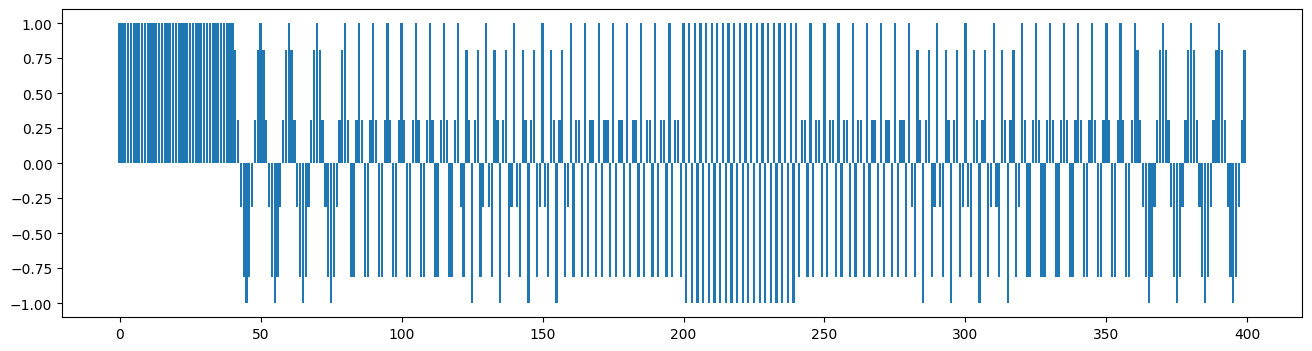

In [ ]:
Omega = 2*np.pi/10
X = np.arange(400)
Y = []

for L in range(0,10):
    for K in range(0,40):
        N = K+40*L
        Y.append(np.cos(Omega*N*L))

plt.figure(figsize=(16, 4)) #size in inches. Breite 16inch; Höhe: 4inch
plt.bar(X,Y)
plt.show()

# Vorlesung 3

## Digitale LZI - Systeme S. 19 Beispiel

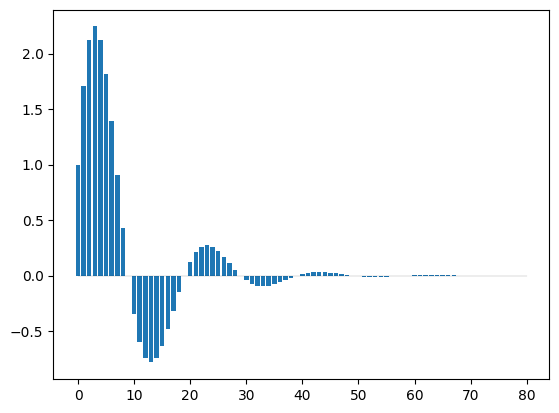

In [ ]:
#h(n) = 1.7119 h(n-1) - 0.81h(n-2) + \delta (n)

def delta_f(i):
    if i == 0:
        return 1
    else:
        return 0

h_arr = []

def h(n):
    if n < 2:
        if n < 0:
            return 0
        else:
            return 1.7119*h(n-1) - 0.81*h(n-2) + delta_f(n)
    else:
        return h_big(n) # rekursiv dauert zu lange

def h_big(n):
        #über gespeicherte werte rechnen anstatt weiter rekursiv
        return 1.7119*h_arr[n-1] - 0.81*h_arr[n-2] + delta_f(n)


h_arr = []

for i in range(80):
    #print("h(", i, ") = %f.4" %h(i))
    h_arr.append(h(i))

x_values = np.arange(len(h_arr))

plt.plot([0,len(h_arr)],[0,0],'k', linewidth = 0.1)
plt.bar(x_values, h_arr)
plt.show()

## S.24 Beispiel

In [ ]:
print("Seite 24 Beispiel")
print("(a) Impulsantwort:")
def y_i(n):
    if n < 0:
        return 0;
    if n == 1:
        return 1
    else:
        return y(n-1)*0.9

for i in range (10):
    print(y_i(i))

print("\n(a) Sprungantwort:")
def y_s(n):
    if n < 0:
        return 0;
    if n == 0:
        return 1
    else:
        return 1+y(n-1)*0.9

for i in range (10):
    print(y_s(i))

print("\n(b) y(n)")
def y_b(n):
    return y_s(n) - y_s(n-3)

for i in range (10):
    print(y_b(i))

Seite 24 Beispiel
(a) Impulsantwort:
0.0
1
1.71
2.439
3.0951
3.6855900000000004
4.217031
4.6953279000000006
5.12579511
5.5132155990000005

(a) Sprungantwort:
1
1.9
2.71
3.439
4.0951
4.68559
5.217031
5.6953279000000006
6.12579511
6.5132155990000005

(b) y(n)
1
1.9
2.71
2.439
2.1951000000000005
1.9755900000000004
1.7780310000000004
1.6002279000000001
1.44020511
1.296184599


# Vorlesung 4

##Wetterdaten

<p>Columns: time, tavg, tmin, tmax, prcp(percepetation), snow, wdir, wspd, wpgt (max windugst), pres, tsun <p>

In [ ]:
#install the weather library
!pip install meteostat

#import meteostat library
from datetime import datetime

from meteostat import Point, Daily
#doc: https://dev.meteostat.net/python/daily.html#example

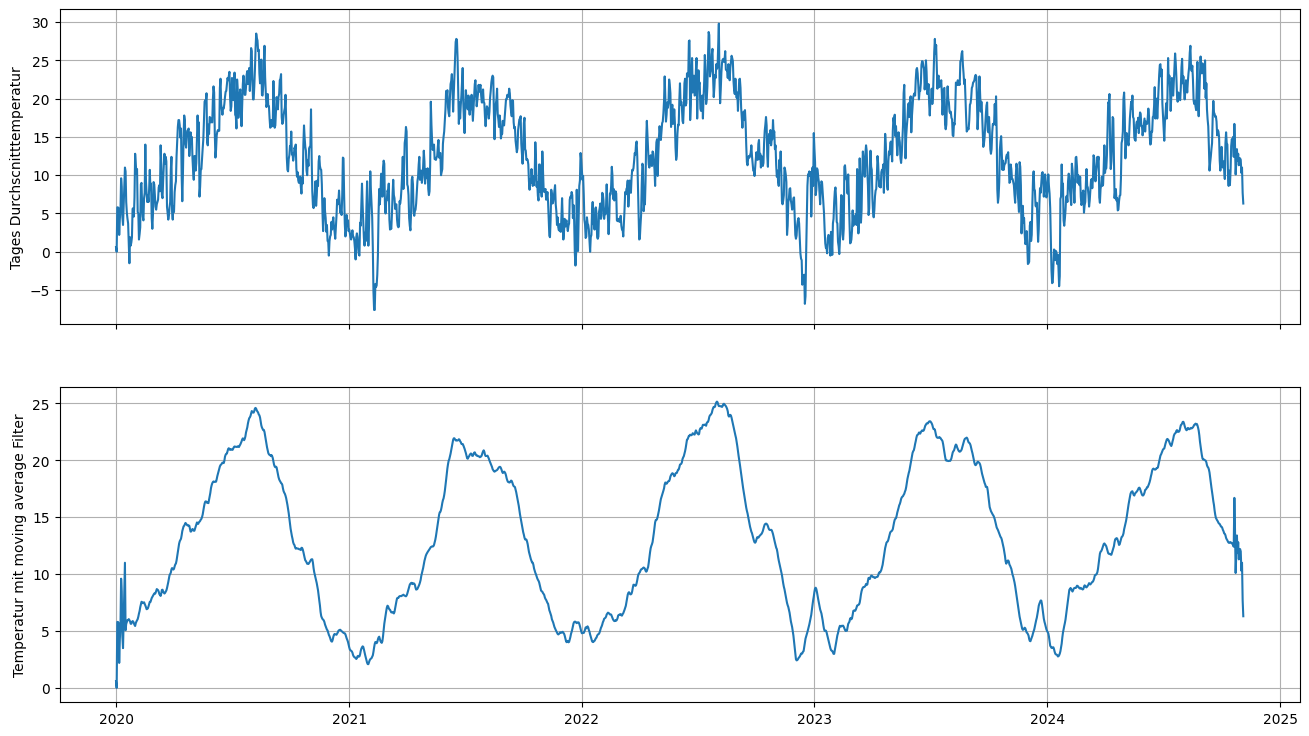

In [ ]:
#set time period
start = datetime(2020,1,1)
end = datetime(2024,11,4)

#create point for Frankfurt
ffm = Point(50.110924,8.682127,112)

#get daily data
data = Daily(ffm,start,end)
data = data.fetch()
tavg = data['tavg']
#print(tavg.head())
#nr_rows, nr_columns = data.shape
#print(nr_rows, " ", nr_columns)

#moving average filter

n = 30 #Anzahl werte über die Moving Average gebildet wird, muss gerade sein
t_moving = []

#ersten n/2 werte der original wetterdaten hinzufügen
#damit moving average filter werte zum berechnen hat
for i in range(int(n/2)):
    t_moving.append(tavg[i])

temp_val = 0.0
#moving average anwenden
for i in range(int(n/2), len(tavg)-int(n/2)):
    for i2 in range(int(-n/2),int(n/2)):
        temp_val += tavg[i-i2]

    temp_val = temp_val /n
    t_moving.append(temp_val)

#letzten n/2 werte der wetterdaten hinzufügen
for i in range(int(n/2),0,-1):
    t_moving.append(tavg[-i])

#Plot line chart including average, minimum and maximum temperature
fig, axs = plt.subplots(2, sharex=True, figsize=(16, 9))
axs[0].plot(data.index,data['tavg'])
axs[0].set_ylabel('Tages Durchscnitttemperatur')
axs[0].grid(True)


axs[1].plot(data.index,t_moving)
axs[1].set_ylabel('Temperatur mit moving average Filter')
axs[1].grid(True)

plt.show()

# Vorlesung 5

## Beispiel Kreuzkorrelation

28


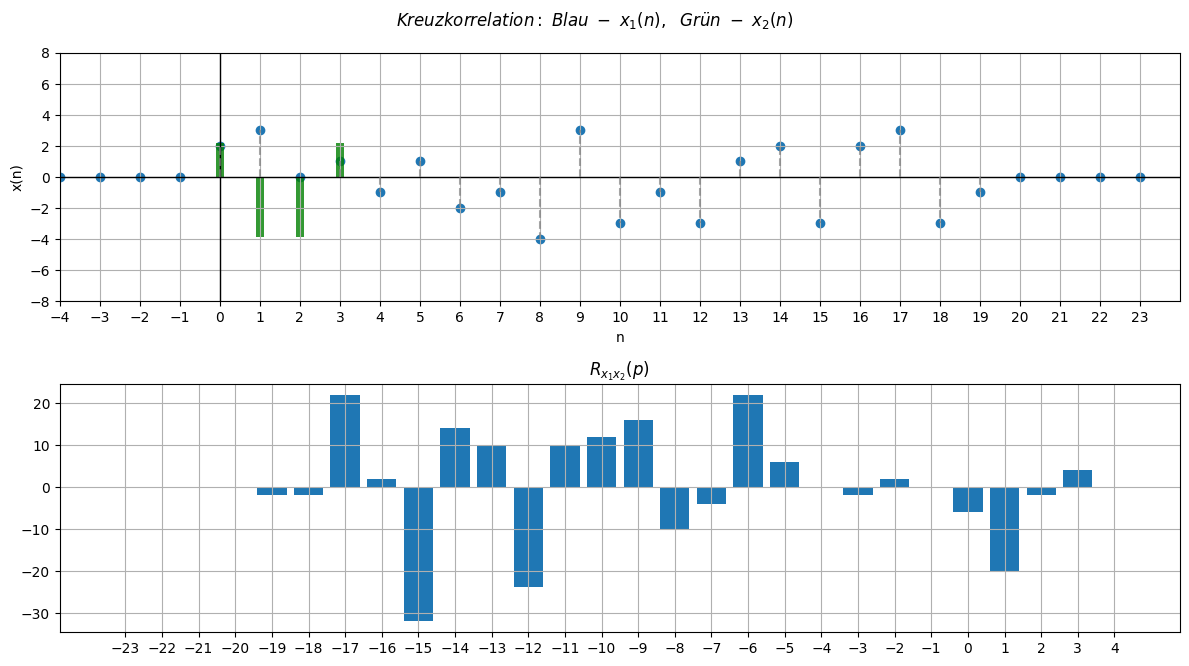

In [ ]:
import random

#Signale generieren
#x1
nuller_vorne = np.zeros(4,dtype = int)
zufallswerte= np.random.randint(-4,4,size=20)
nuller_hinten = np.zeros(4,dtype = int)
x1 = np.concatenate((nuller_vorne, zufallswerte, nuller_hinten))

print(len(x1))
#x2
x2 = np.random.randint(-4,4, size=4)
x2_pos = random.randint(0,20)


#x2 signal array auf gleiche größe bringen
x2_lang = np.zeros(28)
for i in range(len(x2)):
    x2_lang[x2_pos + i] = x2[i] + 0.15


#Korrelation berechnen
KreuzKorrelation = np.zeros((28,2), dtype = int)

for i in range(28):
    x2_temp = np.zeros(28)
    if (i<=24):
        for j in range(len(x2)):
            x2_temp[i + j] = x2[j]
        KreuzKorrelation[i] = (x2_pos-i, np.sum(x1*x2_temp))
    else:
        KreuzKorrelation[i] = (x2_pos-i, 0)

# Signal Plotten
fig,(ax1,ax2) = plt.subplots(2, figsize=(12,6.75))

x = range(-4,24,1)
ax1.axis([-4,24,-8,8]) #fenstergröße
ax1.plot([-4,24],[0,0],'k',linewidth=1) # x-achse
ax1.plot([0,0],[-8,8],'k',linewidth=1) # y-achse

#plot signal datenpunkte
ax1.scatter(x,x1)
#plot gestrichelte linien
ax1.vlines(x, ymin=0,ymax=x1, color = 'gray', linestyle='--', alpha = 0.7)

#x2 signal als grünen bar-chart
ax1.bar(x,x2_lang,width = 0.2, color = 'green', alpha = 0.8)

#set up axis and title
ax1.set_xlabel("n")
ax1.set_ylabel("x(n)")
title_x1 = r"$Kreuzkorrelation: ~Blau ~-~ x_1(n), ~~Grün ~-~ x_2(n)$"
fig.suptitle(title_x1)
ax1.grid(True)
ax1.set_xticks(x)

#Ergebnis der Kreuzkorrelation Plotten
ax2.bar(KreuzKorrelation[:,0], KreuzKorrelation[:,1])
ax2.grid(True)
title_x2 = r"$R_{x_1 x_2}(p)$"
ax2.set_title(title_x2)
ax2.set_xticks(KreuzKorrelation[:,0])


fig.tight_layout()
plt.show()

# Vorlesung 6

## Beispiel Diskrete Fourier Reihe, Beispiel S.37

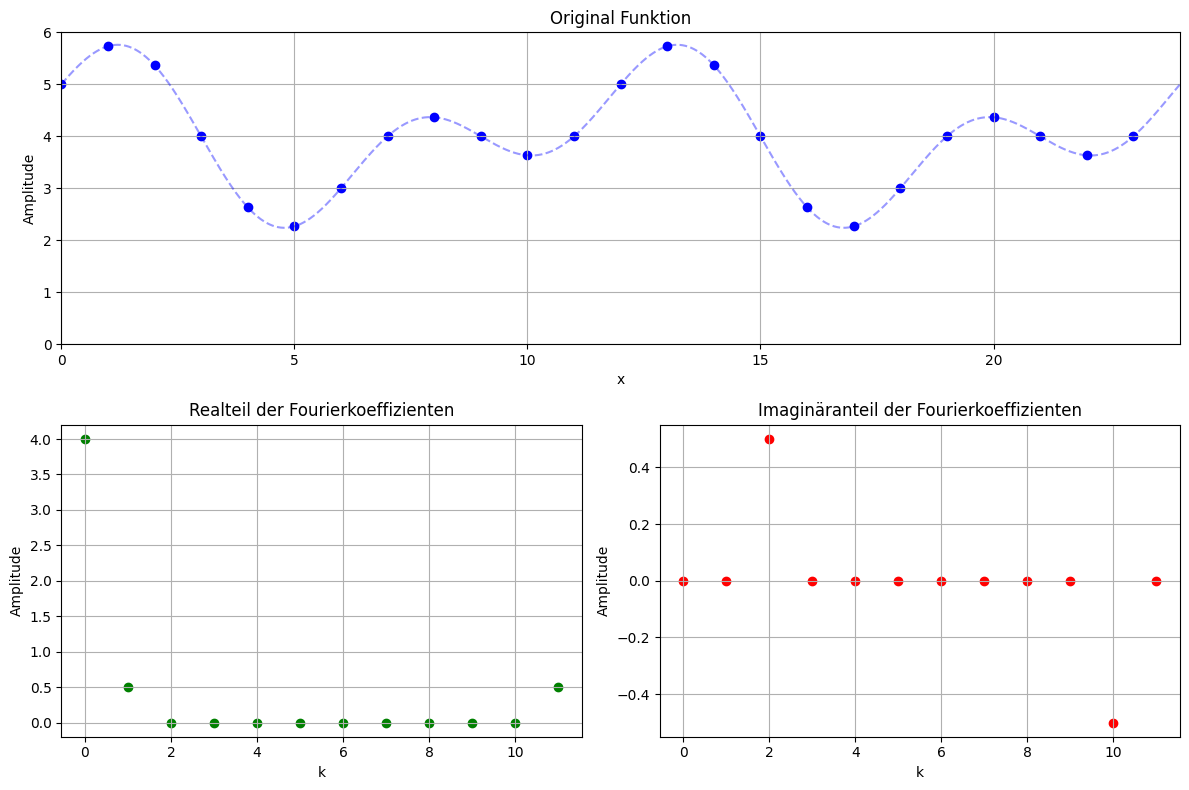

In [ ]:
# X(n) = 4 + cos(2.0*pi*n/12) + sin (2.0*pi*n/6.0)

x = np.arange(0,24,0.01)

y = 4 + np.cos(2.0 * np.pi * x /12 ) + np.sin(2.0 * np.pi * x/6)

n = np.arange(0,12,1)
x_n = 4 + np.cos(2.0 * np.pi * n /12 ) + np.sin(2.0 * np.pi * n/6)
CR = np.zeros(12)
CI = np.zeros(12)

for K in range(0,12):
    for N in range(0,12):
        CR[K] = CR[K] + (1/12)*x_n[N]*np.cos(2*np.pi*K*N/12)
        CI[K] = CI[K] + (1/12)*x_n[N]*np.sin(2*np.pi*K*N/12)

fig = plt.figure(figsize=(12, 8))

# Originalfunktion plotten (doppelt so breit, breite über colspan)
ax1 = plt.subplot2grid((2, 2), (0, 0), colspan=2) #subplot2grid für colspan
ax1.plot(x,y, linestyle='--', color='b', alpha = 0.4)
ax1.scatter(n,x_n, color='b') #scatter 1. periode
ax1.scatter(range(12,24),x_n, color='b') #scatter 2. periode
ax1.axis([0,24,0,6]) #axen-abschnitt
ax1.set_title('Original Funktion')
ax1.set_xlabel('x')
ax1.set_ylabel('Amplitude')
ax1.grid(True)

# Realteil der Fourier-Koeffizienten plotten
ax2 = plt.subplot2grid((2, 2), (1, 0), colspan=1)
ax2.scatter(n, CR, color='g')
ax2.set_title('Realteil der Fourierkoeffizienten')
ax2.set_xlabel('k')
ax2.set_ylabel('Amplitude')
ax2.grid(True)

# Imaginärteil der Fourier-Koeffizienten plotten
ax3 = plt.subplot2grid((2, 2), (1, 1), colspan=1)
ax3.scatter(n, CI, color='r')
ax3.set_title('Imaginäranteil der Fourierkoeffizienten')
ax3.set_xlabel('k')
ax3.set_ylabel('Amplitude')
ax3.grid(True)

plt.tight_layout()
plt.show()

## Fourier Koeffizienten: Betrag und Winkel (S.40)

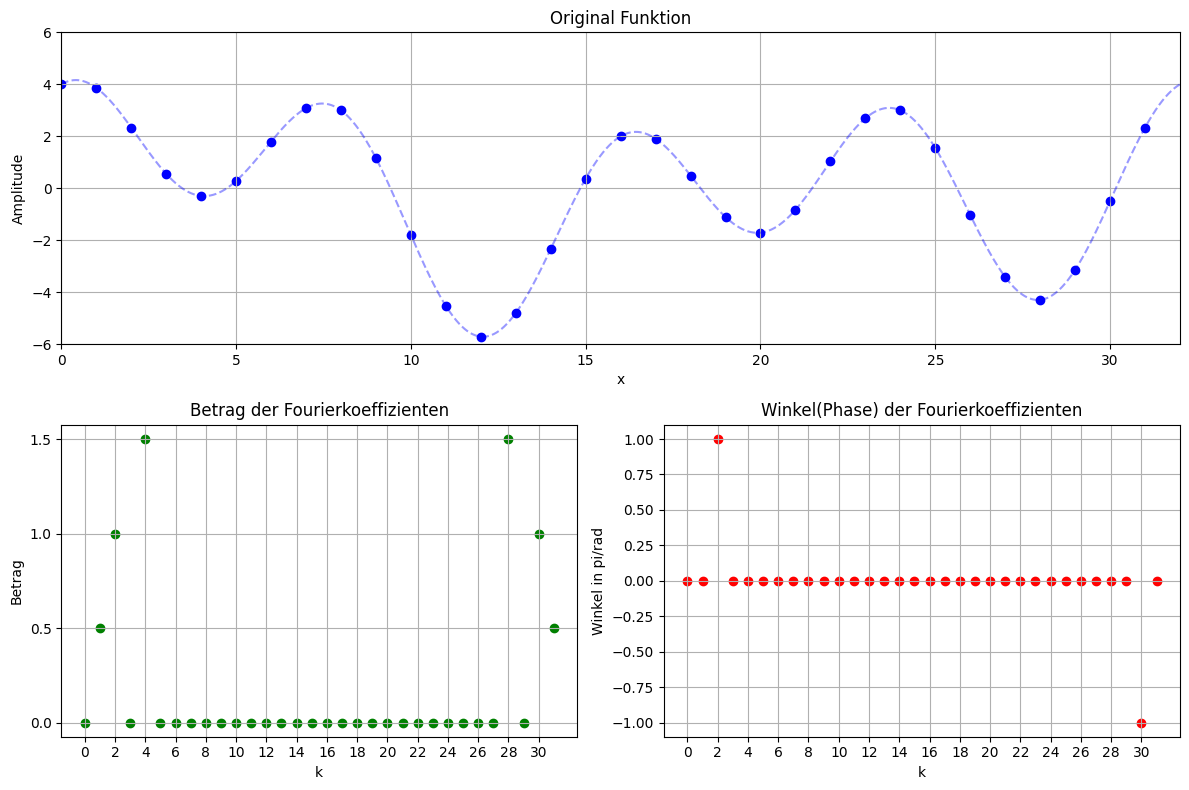

In [ ]:
x = np.arange(0,32,0.01)

y = np.cos(2.0 * np.pi * x /32 ) + 2* np.sin(2.0 * np.pi * x/16) + 3*np.cos(2*np.pi*x/8)

n = np.arange(0,32,1)
x_n = np.cos(2.0 * np.pi * n /32 ) + 2* np.sin(2.0 * np.pi * n/16) + 3*np.cos(2*np.pi*n/8)
CR = np.zeros(32)
CI = np.zeros(32)

for K in range(0,32):
    for N in range(0,32):
        CR[K] = CR[K] + (1/32)*x_n[N]*np.cos(2*np.pi*K*N/32)
        CI[K] = CI[K] + (1/32)*x_n[N]*np.sin(2*np.pi*K*N/32)

betrag = np.sqrt(CR**2 + CI**2)
phase = np.arctan2(CI,CR) #atan2() numpy kann winkel abhängig von quadranten

for K in range(0,32): #bei 0/0 kommt datenmüll raus deswegen überschreiben
    if CR[K] == 0 and CI[K] == 0:
        phase[K] = 0

fig = plt.figure(figsize=(12, 8))

# Originalfunktion plotten (doppelt so breit, breite über colspan)
ax1 = plt.subplot2grid((2, 2), (0, 0), colspan=2) #subplot2grid für colspan
ax1.plot(x,y, linestyle='--', color='b', alpha = 0.4)
ax1.scatter(n,x_n, color='b') #scatter 1. periode
ax1.axis([0,32,-6,6]) #axen-abschnitt
ax1.set_title('Original Funktion')
ax1.set_xlabel('x')
ax1.set_ylabel('Amplitude')
ax1.grid(True)

# Betrag der Fourier-Koeffizienten plotten
ax2 = plt.subplot2grid((2, 2), (1, 0), colspan=1)
ax2.scatter(n, betrag, color='g')
ax2.set_title('Betrag der Fourierkoeffizienten')
ax2.set_xlabel('k')
ax2.set_ylabel('Betrag')
ax2.grid(True)
ax2.set_yticks([0, 0.5, 1, 1.5])
ax2.set_xticks(range(0,32,2))


# Phase der Fourier-Koeffizienten plotten
ax3 = plt.subplot2grid((2, 2), (1, 1), colspan=1)
ax3.scatter(n, CI, color='r')
ax3.set_title('Winkel(Phase) der Fourierkoeffizienten')
ax3.set_xlabel('k')
ax3.set_ylabel('Winkel in pi/rad')
ax3.grid(True)
ax3.set_xticks(range(0,32,2))


plt.tight_layout()
plt.show()